# Ford Gobike Data Exploration
## By Ahmed Mohamed Soliman
#### This document explores a dataset containing the trip data of the ford gobike

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as tick
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(df.shape)

(183412, 16)


In [4]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Structure of the dataset:
#### There are 183,412 data trips in the dataset variables are 9 numerical and 7 object type 

In [7]:
# change data type for start and end time to datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
# change data type bike_share_for_all_trip to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

## Now the structure of the dataset is :
####  183,412 data trips in the dataset variables are 9 numerical, 2 datetime, 4 object type and 1 is boolean type

### Now that we know the structure of our data we can go to the exploration part and know :

#### 1- What is/are the main features of interest in our dataset?

  answer : 1- is the trip duration dependent on other features such as: age, start station, end station, user type, and gender?
  
           2- will the trip duration have the strongest effect on each the start stations and end stations ?   

# Univariate Exploration :


#### let's begin with Start Station and End Station :

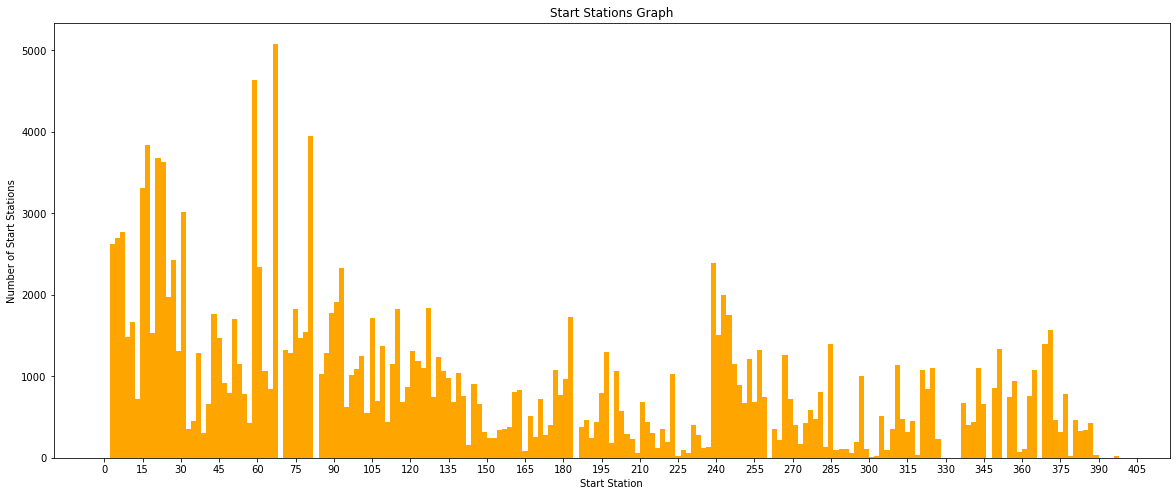

In [10]:
binsize = 2
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[20, 8])
plt.xticks(range(0, 450, 15))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins, color = 'orange')
plt.title('Start Stations Graph')
plt.xlabel('Start Station')
plt.ylabel('Number of Start Stations')
plt.show()

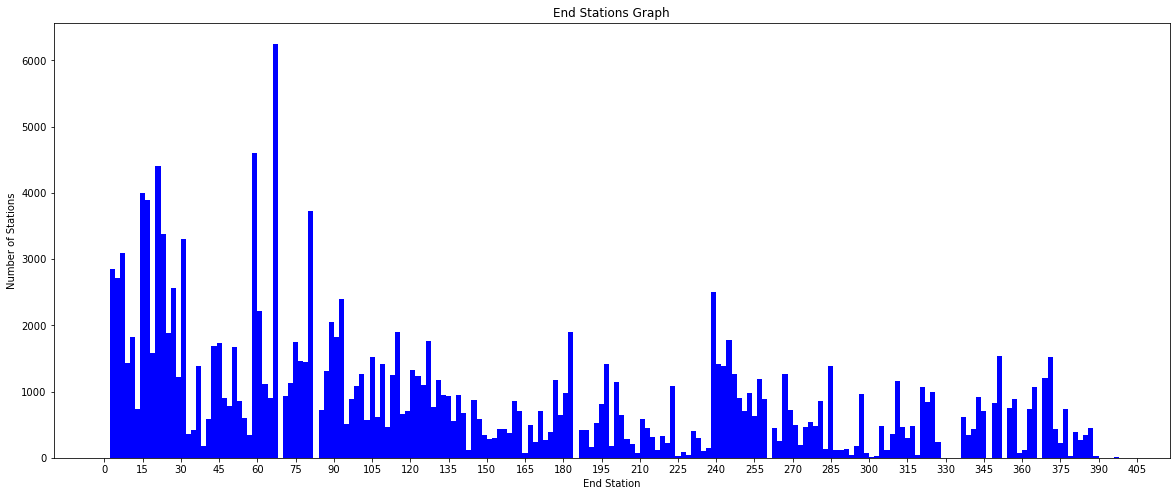

In [11]:
# Plotting end station id distribution.
binsize = 2
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[20, 8])
plt.xticks(range(0, 450, 15))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins, color = 'blue')
plt.title('End Stations Graph')
plt.xlabel('End Station')
plt.ylabel('Number of Stations')
plt.show()

#### as we can see from the 2 graphs above the start stations and end stations are same.

#### Next up I'll start looking at the distribution of : duration_sec.

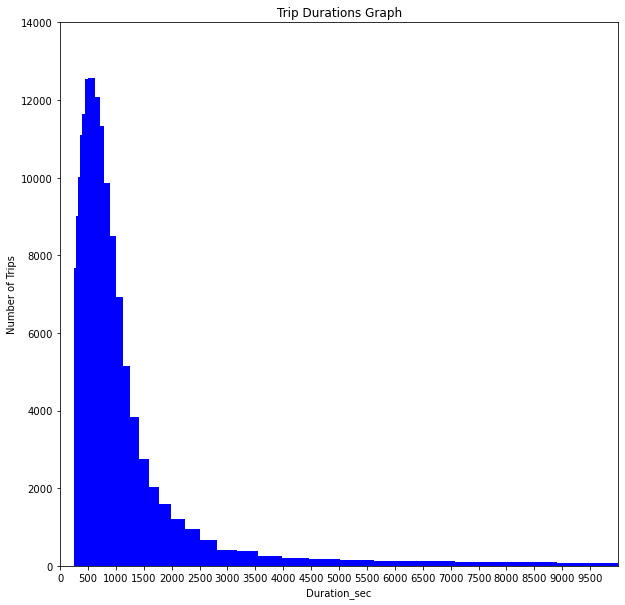

In [12]:
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = df, x = 'duration_sec', bins = bins_log ,color = 'blue')
plt.title('Trip Durations Graph')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([0, 10000, 0, 14000])
plt.xticks(range(0, 10000, 500))
plt.show()

#### Trip duration is mostly centered on values which are less than 2000 seconds with peak around 600 seconds. Number of Trips values first increases starting from around 8000 values to 12000 values at around 600 seconds but then starts to fall below at 2000 values under 2000 seconds

#### now move on to other values like :age, user type, and gender

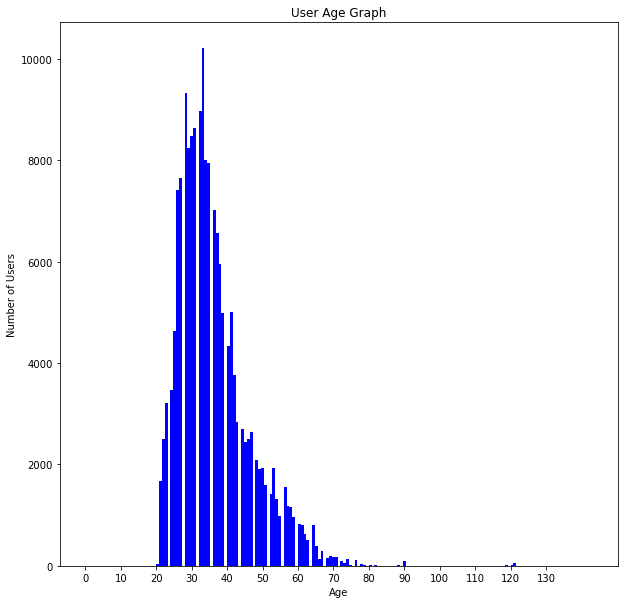

In [13]:
binsize = 0.8
df['age']=  2021 - df['member_birth_year'] #making age column
bins = np.arange(0, df['age'].astype(float).max()+binsize, binsize)
plt.figure(figsize=[10, 10])
plt.hist(data = df.dropna(), x = 'age', bins = bins,color='blue')
plt.xticks(range(0, 140, 10))
plt.title('User Age Graph')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

#### we can see that the distribution is more concentrated between 20 to 40 years old and the peak is about 35 years old.

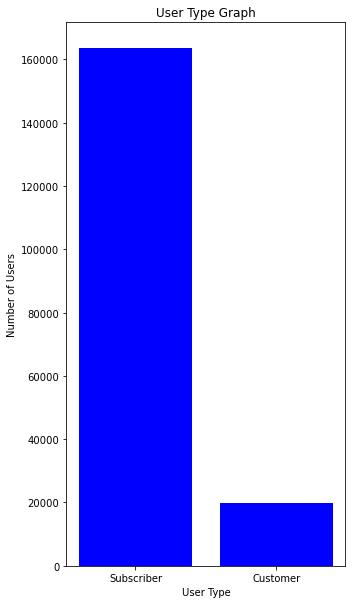

In [14]:
plt.figure(figsize=[5,10])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts(),color='blue')
plt.title('User Type Graph')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

#### Most of the users are Subscribers as shown in the graph

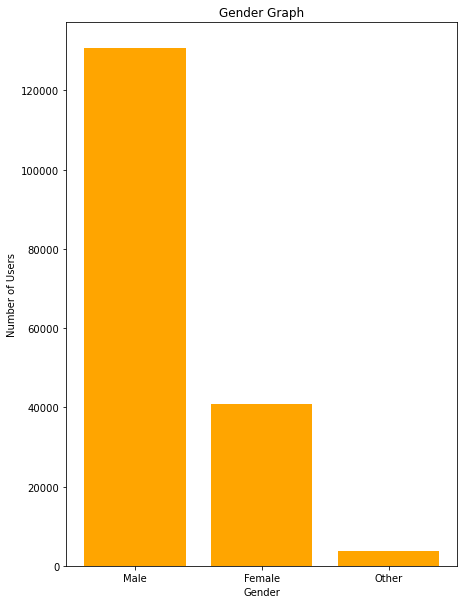

In [15]:
plt.figure(figsize=[7,10])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts(),color='orange' )
plt.title('Gender Graph')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

#### Most of the users are males and Male bikers are about 3 times of female bikers as shown in the graph.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
### Answer: When investigating the Birth year variables, Birth year is converted by substracting the year from current year(2021) in order to give the distibution for age and better perception

# Bivariate Exploration :


### i will start with looking at the duration dependency on Gender

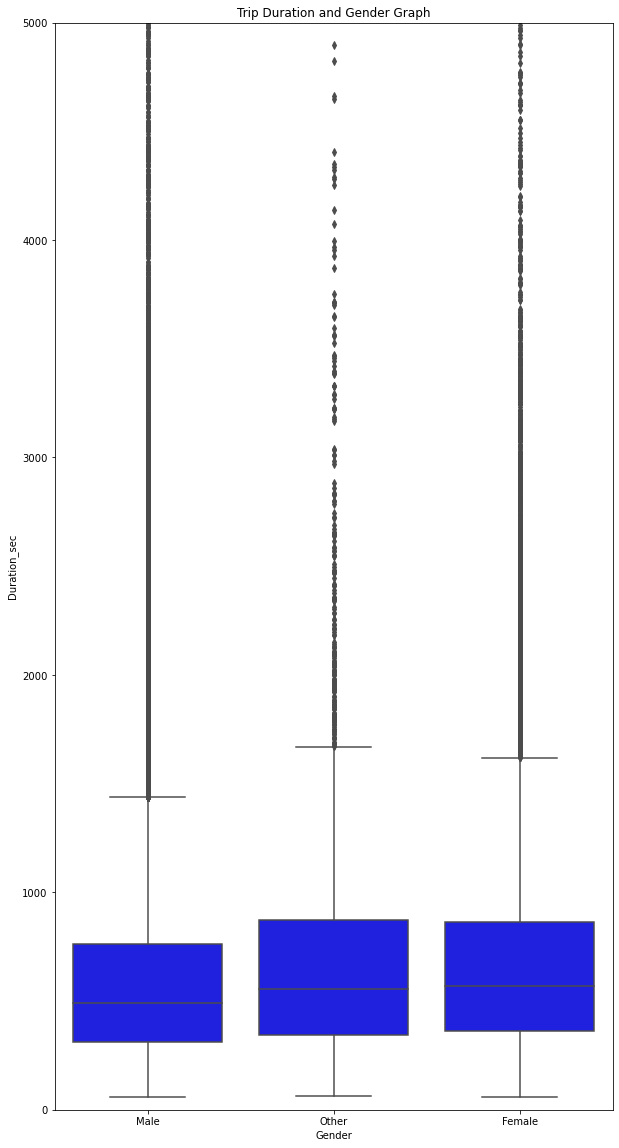

In [16]:
plt.figure(figsize = [10,20])
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = 'blue')
plt.ylim([0, 5000])
plt.title('Trip Duration and Gender Graph')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

#### we can see that higher percentage of female and other rides longer trips then males although number of male riders are higher than other and female.

#### moving on to look at the duration dependency on user type

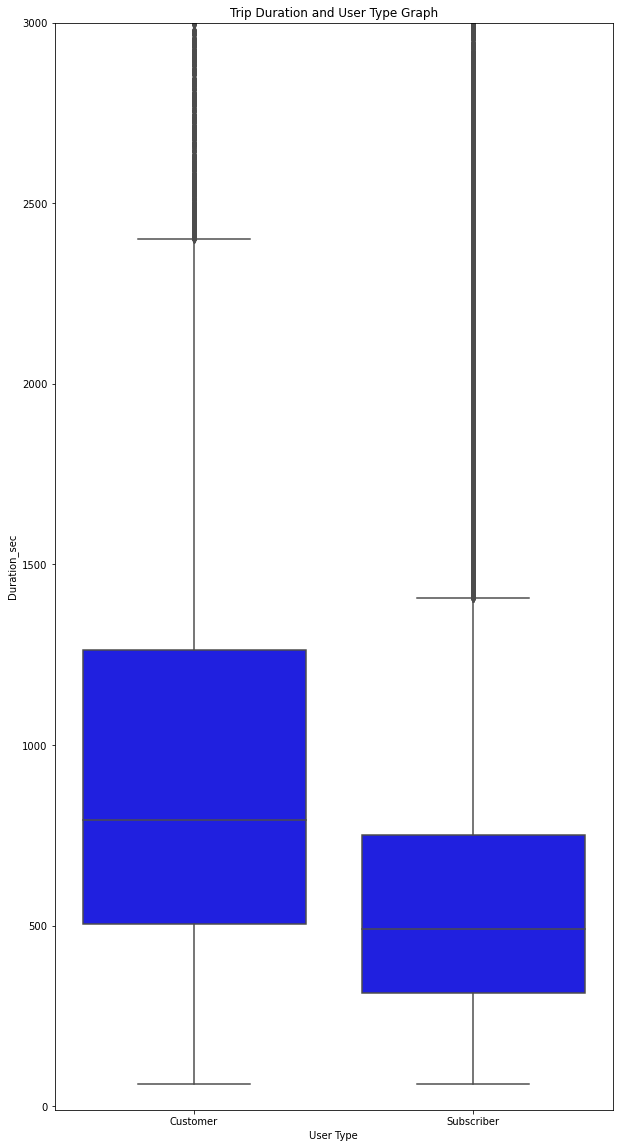

In [17]:
plt.figure(figsize = [10,20])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = 'blue')
plt.ylim([-10, 3000])
plt.title('Trip Duration and User Type Graph')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

#### we can see that higher percentage of customer rides longer trips then subscriber although number of subscriber riders are higher than customers

### Did you observe any interesting relationships between the other features?
#### I thought that variables which are user type and gender values having higher value will get higher trip duration but it is the opposite. For gender, value of male members is very high but it got lower trip duration.
#### For user type, value of subscriber members is very high but it got lower trip duration then customer.

# Multivariate Exploration :


#### in this part of the analysis we want to explore how the three categorical measures of user type and gender into the relationship between trip duration and age

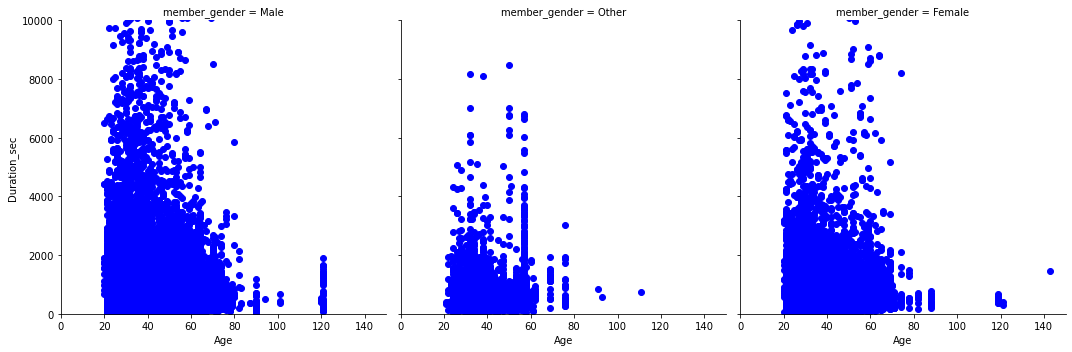

In [18]:
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 5,xlim = [0, 150], ylim = [0, 10000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1,color='blue')
gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
plt.show()

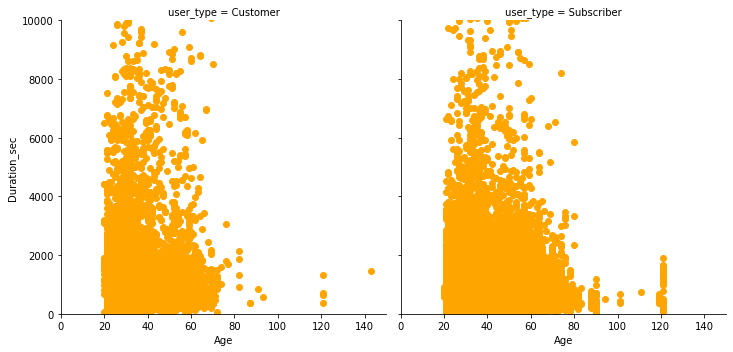

In [19]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 3, size = 5,xlim = [0, 150], ylim = [-0, 10000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1,color='orange')
user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
plt.show()

#### the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration

#### the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age

#### I observed that although the number of users for male is higher but percentage is higher for women and other in trip duration. And,for the others leap at an older age (around 60 years) to got 3000 trip duration which is a peak. Also, for subscribers the trip duration is higher than customer for old age.